# 1 - Initialisation

- Import all modules

In [ ]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sb

- Load Data Set (CSV)

In [ ]:
df = pd.read_csv("bank-full.csv")

- Clear Data Set

In [ ]:
df['default'] = df['default'].map( 
                   {'yes':1 ,'no':0}) 
df['housing'] = df['housing'].map( 
                   {'yes':1 ,'no':0}) 
df['loan'] = df['loan'].map( 
                   {'yes':1 ,'no':0}) 
df['Target'] = df['Target'].map( 
                   {'yes':1 ,'no':0}) 

#df = df.drop(['contact','day','month','campaign',"pdays", "previous", "poutcome"], axis=1)
df = df.drop(['contact','day','month','poutcome'], axis=1)


df[['job', 'marital', 'education']] = df[['job', 'marital', 'education']].apply(lambda x: pd.factorize(x)[0])


# 2 - Analyse des données

### Affichage de la table et des types

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,0,0,0,0,2143,1,0,261,1,-1,0,0
1,44,1,1,1,0,29,1,0,151,1,-1,0,0
2,33,2,0,1,0,2,1,1,76,1,-1,0,0
3,47,3,0,2,0,1506,1,0,92,1,-1,0,0
4,33,4,1,2,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,0,0,977,3,-1,0,1
45207,71,5,2,3,0,1729,0,0,456,2,-1,0,1
45208,72,5,0,1,0,5715,0,0,1127,5,184,3,1
45209,57,3,0,1,0,668,0,0,508,4,-1,0,0


- Analyse de la donnee manquante

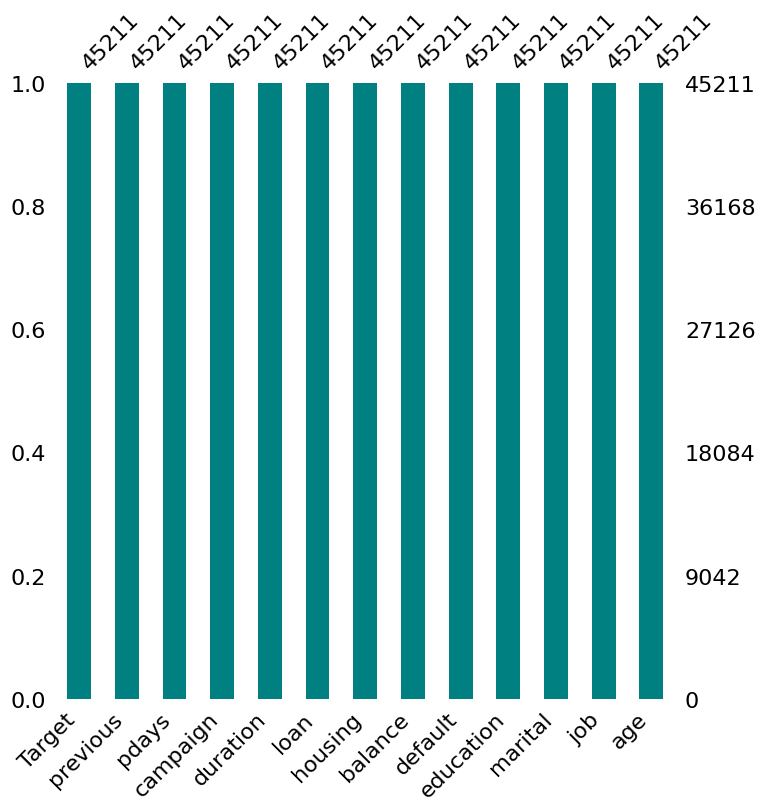

In [ ]:
msss = ms.bar(df, figsize = (8,8), fontsize= 16, color = 'teal', sort = 'descending')


- Affichage de la dispertion des données 

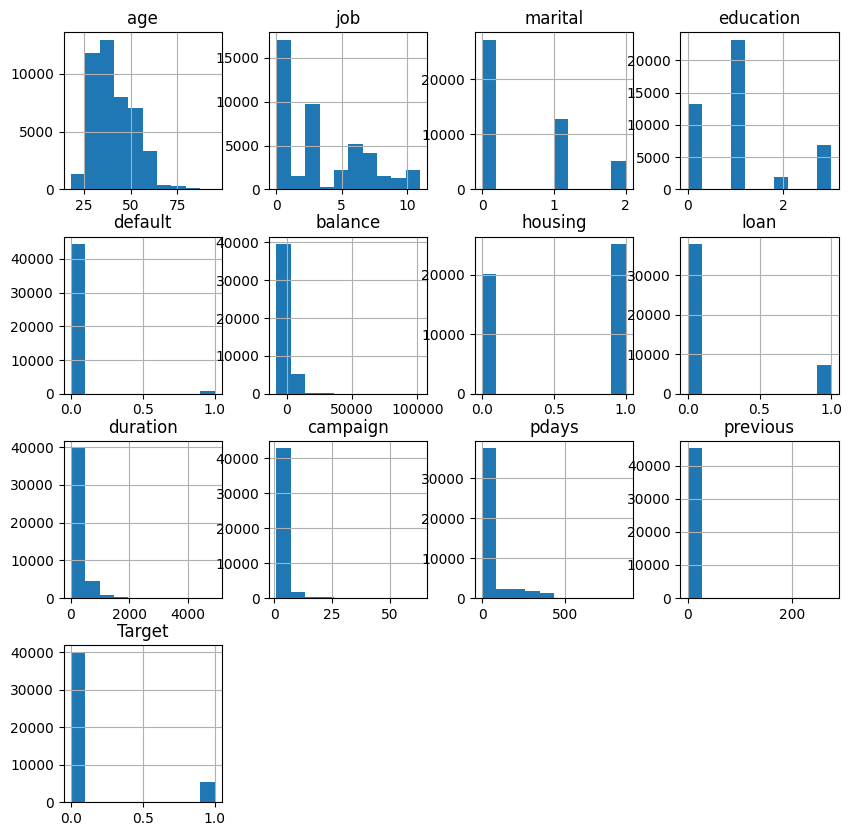

In [ ]:
df.hist(figsize=(10,10))
plt.show()

- Price correlation 


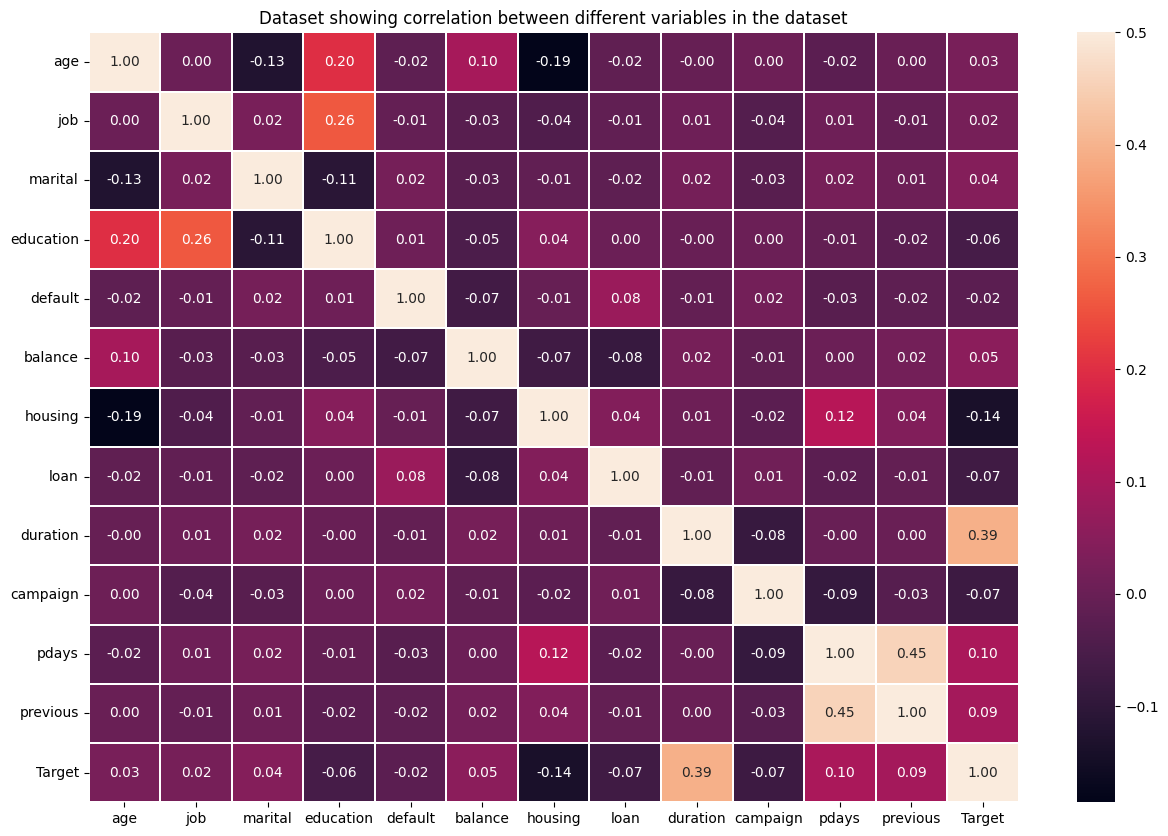

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corr, vmax=.5, annot=True, fmt='.2f', linewidths=.2,)
plt.title('Dataset showing correlation between different variables in the dataset')
plt.show()


correlé/correlé + couleur target (verif a faire)